In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


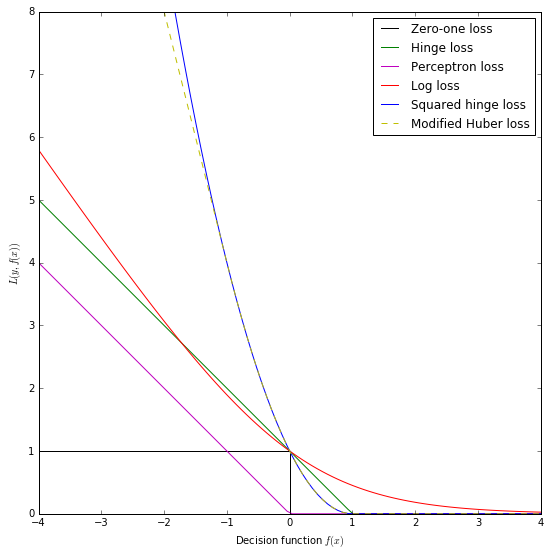

In [6]:
figure = plt.figure(figsize=(9, 9))
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-',
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-',
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), 'm-',
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, 'b-',
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), 'y--',
         label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")
plt.show()

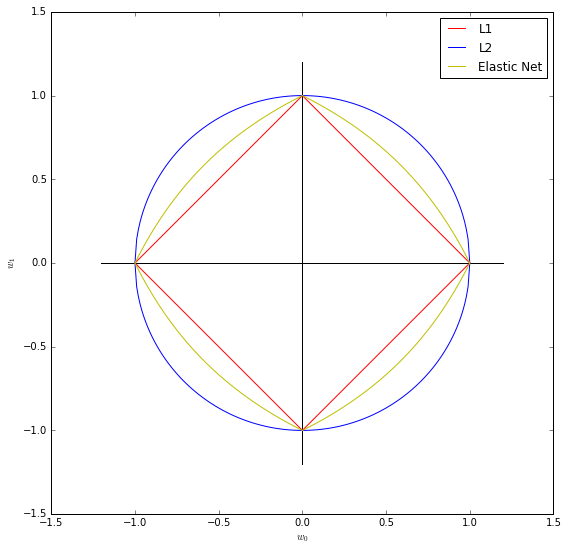

In [4]:
figure = plt.figure(figsize=(9, 9))
def l1(xs):
    return np.array([np.sqrt((1 - np.sqrt(x ** 2.0)) ** 2.0) for x in xs])


def l2(xs):
    return np.array([np.sqrt(1.0 - x ** 2.0) for x in xs])


def el(xs, z):
    return np.array([(2 - 2 * x - 2 * z + 4 * x * z -
                      (4 * z ** 2
                       - 8 * x * z ** 2
                       + 8 * x ** 2 * z ** 2
                       - 16 * x ** 2 * z ** 3
                       + 8 * x * z ** 3 + 4 * x ** 2 * z ** 4) ** (1. / 2)
                      - 2 * x * z ** 2) / (2 - 4 * z) for x in xs])


def cross(ext):
    plt.plot([-ext, ext], [0, 0], "k-")
    plt.plot([0, 0], [-ext, ext], "k-")

xs = np.linspace(0, 1, 100)

alpha = 0.501  # 0.5 division throuh zero

cross(1.2)

plt.plot(xs, l1(xs), "r-", label="L1")
plt.plot(xs, -1.0 * l1(xs), "r-")
plt.plot(-1 * xs, l1(xs), "r-")
plt.plot(-1 * xs, -1.0 * l1(xs), "r-")

plt.plot(xs, l2(xs), "b-", label="L2")
plt.plot(xs, -1.0 * l2(xs), "b-")
plt.plot(-1 * xs, l2(xs), "b-")
plt.plot(-1 * xs, -1.0 * l2(xs), "b-")

plt.plot(xs, el(xs, alpha), "y-", label="Elastic Net")
plt.plot(xs, -1.0 * el(xs, alpha), "y-")
plt.plot(-1 * xs, el(xs, alpha), "y-")
plt.plot(-1 * xs, -1.0 * el(xs, alpha), "y-")

plt.xlabel(r"$w_0$")
plt.ylabel(r"$w_1$")
plt.legend()

plt.axis("equal")
plt.show()

In [8]:
classifiers = [RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               SGDClassifier(loss="hinge", alpha=0.01, n_iter=200, fit_intercept=True),
               GaussianNB()]
names = ["Random Forests","Stocastic Gradient Descent","Naive Bayes"]

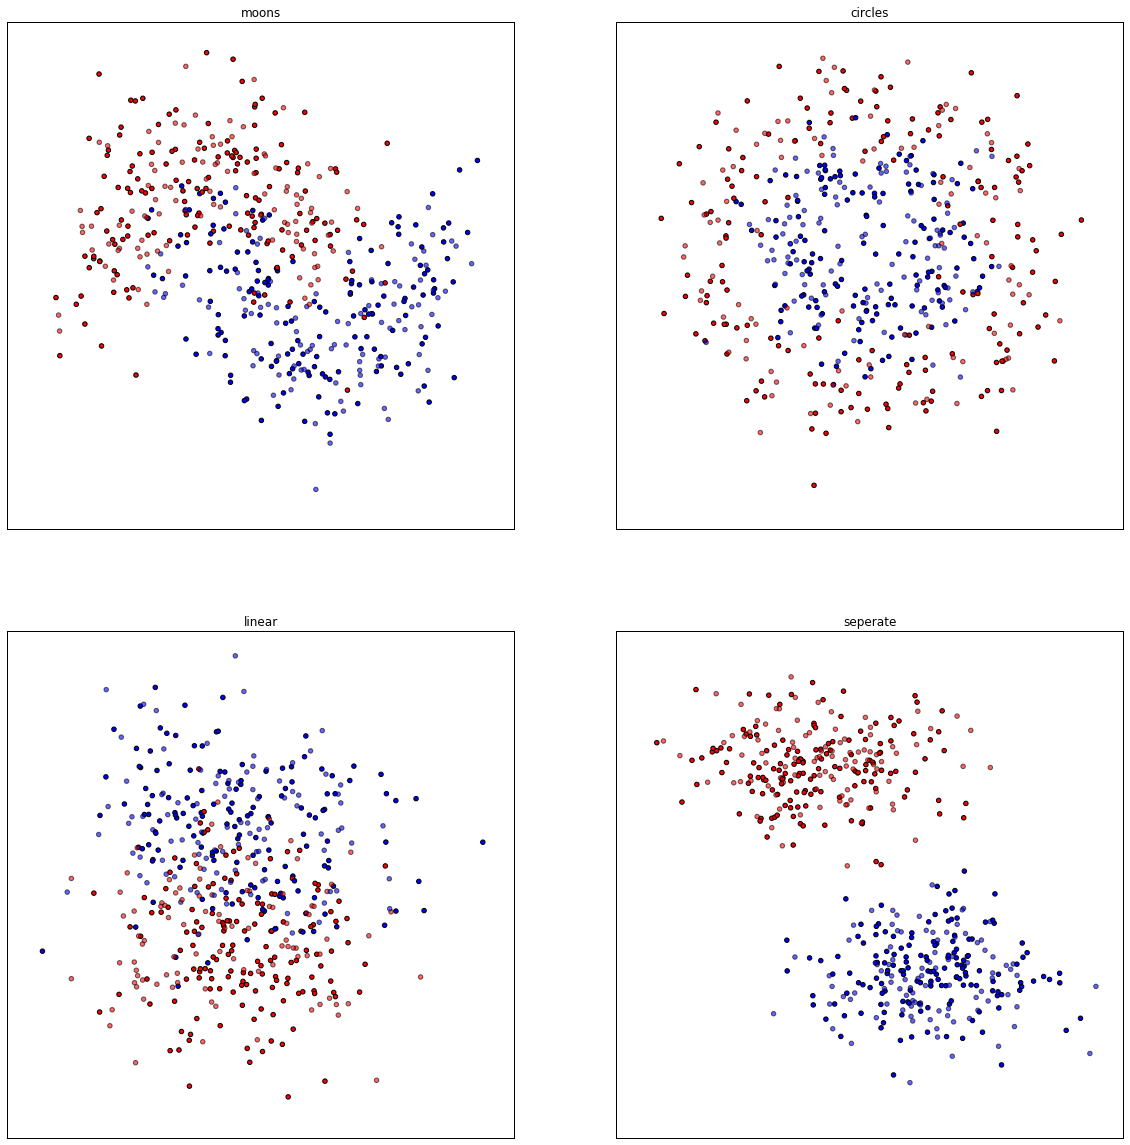

In [86]:
figure = plt.figure(figsize=(20, 20))
for i,dataset in enumerate(datasets):
    # preprocess dataset, split into training and test part
    name,ds = dataset
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(2,2, i+1)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_title(name)
    ax.set_yticks(())
plt.show()

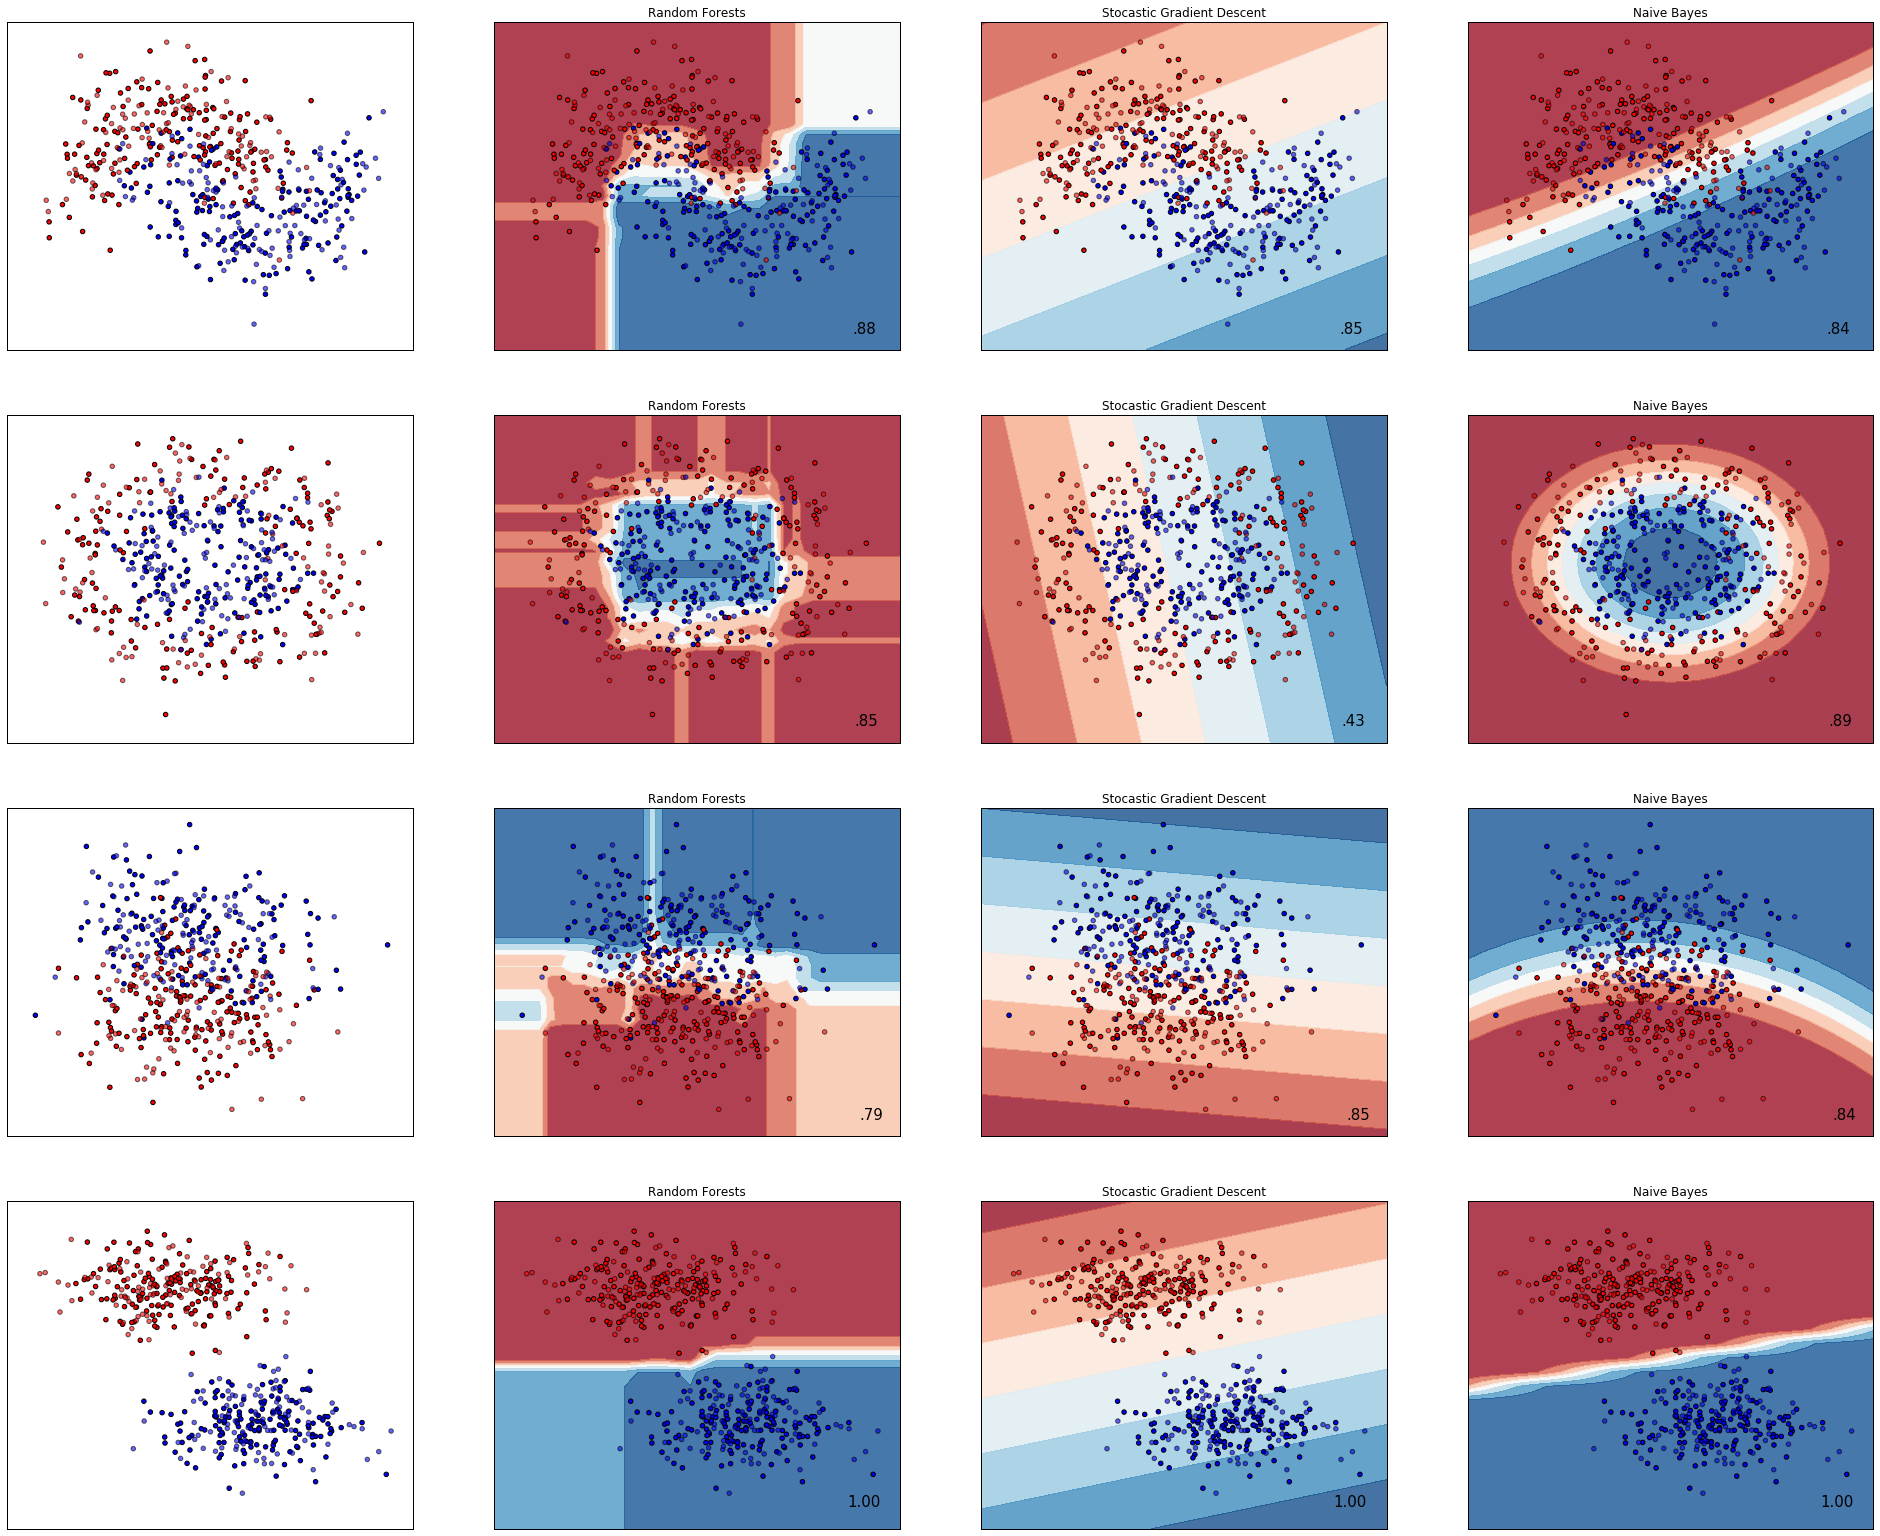

In [11]:
i = 1
figure = plt.figure(figsize=(27, 27))
# iterate over datasets
for dataset in datasets:
    # preprocess dataset, split into training and test part
    name,ds = dataset
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, m_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
figure.subplots_adjust(left=.02, right=.98)
plt.show()